
[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
x_train.shape: (2,)
Number of training examples is: 2
(x^(0), y^(0)) = (1.0, 300.0)


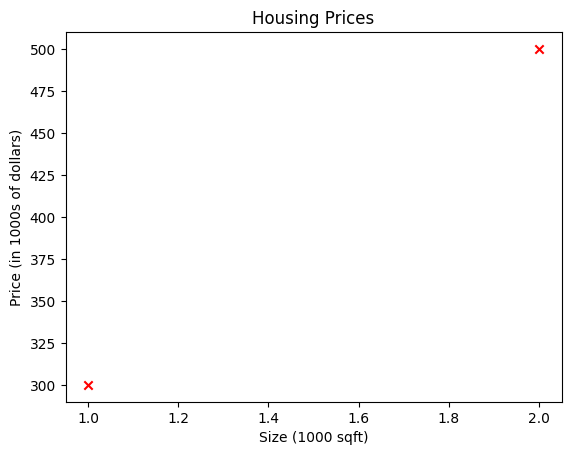

In [1]:
!pip install numpy matplotlib --upgrade --quiet

import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('./deeplearning.mplstyle')
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

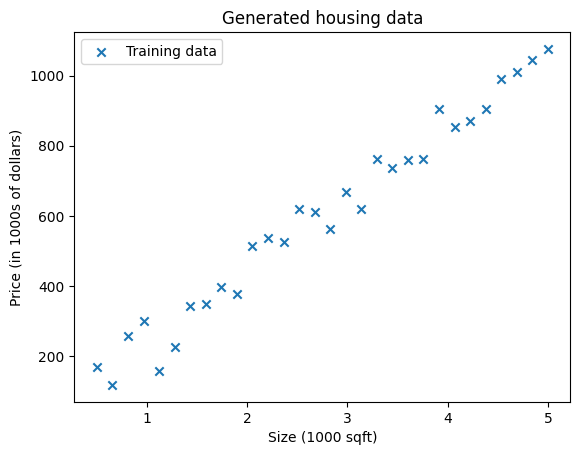

Analytic solution (np.polyfit): w = 206.4221, b = 33.3480
Gradient Descent result: w = 206.1965, b = 34.1021
Final cost: 1012.6657


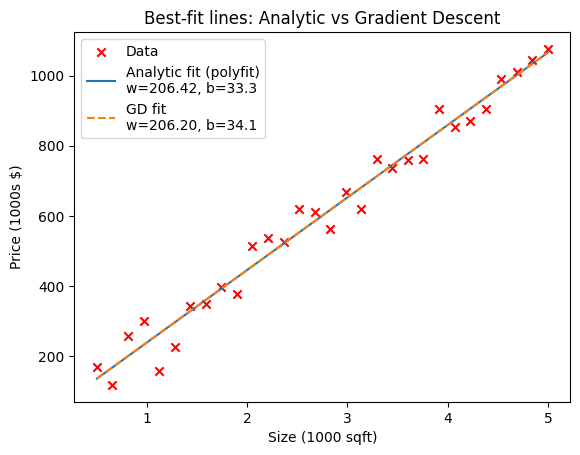

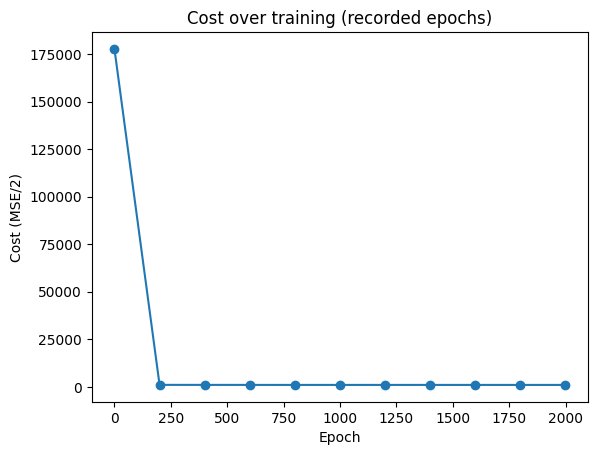

Predictions (GD) for [1.2 2.7 4. ] -> [281.53781609 590.83251353 858.88791798]


In [1]:
# ---------------------------
# 1) Хэрэв хэрэгтэй бол сан суулгах (Jupyter-д нэг cell-д ажиллуулна)
# !pip install numpy matplotlib
# ---------------------------

import numpy as np
import matplotlib.pyplot as plt

# ---- 2) Илүү их дата үүсгэх (жишээ) ----
# Жинхэнэ төсөөлөл: үнэ (1000$) = 200 * size(1000 sqft) + 50 + бага зэрэг санамсаргүй дуудагдал
rng = np.random.default_rng(seed=42)
x_train = np.linspace(0.5, 5.0, 30)              # 30 жишээ: 0.5-5.0 (1000 sqft)
y_train = 200.0 * x_train + 50.0 + rng.normal(0, 60, size=x_train.shape)  # нэмэлт шум

# Эхний дата харуулах
plt.scatter(x_train, y_train, marker='x', label='Training data')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.title('Generated housing data')
plt.legend()
plt.show()

# ---- 3) np.polyfit ашиглан аналитик шийдэл ----
w_analytic, b_analytic = np.polyfit(x_train, y_train, 1)
print(f"Analytic solution (np.polyfit): w = {w_analytic:.4f}, b = {b_analytic:.4f}")

# ---- 4) Gradient Descent (vectorized implementation) ----
def predict(x, w, b):
    return w * x + b

def compute_cost(x, y, w, b):
    m = x.shape[0]
    preds = predict(x, w, b)
    cost = (1/(2*m)) * np.sum((preds - y)**2)
    return cost

def gradient_descent(x, y, w_init=0.0, b_init=0.0, lr=0.01, epochs=1000, verbose=False):
    m = x.shape[0]
    w = w_init
    b = b_init
    history = []
    for epoch in range(epochs):
        preds = predict(x, w, b)
        error = preds - y
        # gradients (vectorized)
        dw = (1/m) * np.dot(error, x)    # scalar
        db = (1/m) * np.sum(error)      # scalar
        # update
        w -= lr * dw
        b -= lr * db
        if epoch % max(1, epochs//10) == 0 or epoch == epochs-1:
            c = compute_cost(x, y, w, b)
            history.append((epoch, w, b, c))
            if verbose:
                print(f"Epoch {epoch:4d} | w={w:.4f} b={b:.4f} cost={c:.4f}")
    return w, b, history

# Hyperparameters — та туршиж өөрчилж болно
w_init = 0.0
b_init = 0.0
learning_rate = 0.01
epochs = 2000

w_gd, b_gd, hist = gradient_descent(x_train, y_train, w_init, b_init, lr=learning_rate, epochs=epochs, verbose=False)
print(f"Gradient Descent result: w = {w_gd:.4f}, b = {b_gd:.4f}")
print(f"Final cost: {compute_cost(x_train, y_train, w_gd, b_gd):.4f}")

# ---- 5) График: өгөгдөл, тохирсон шугамууд ----
x_line = np.linspace(x_train.min(), x_train.max(), 100)
plt.scatter(x_train, y_train, marker='x', color='red', label='Data')
plt.plot(x_line, predict(x_line, w_analytic, b_analytic), label=f'Analytic fit (polyfit)\nw={w_analytic:.2f}, b={b_analytic:.1f}')
plt.plot(x_line, predict(x_line, w_gd, b_gd), '--', label=f'GD fit\nw={w_gd:.2f}, b={b_gd:.1f}')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (1000s $)')
plt.title('Best-fit lines: Analytic vs Gradient Descent')
plt.legend()
plt.show()

# ---- 6) Loss буурах график (epochs дээр) ----
epochs_rec = [h[0] for h in hist]
cost_rec = [h[3] for h in hist]

plt.plot(epochs_rec, cost_rec, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Cost (MSE/2)')
plt.title('Cost over training (recorded epochs)')
plt.show()

# ---- 7) Жишээ: шинэ дата дээр таамаг ----
x_test = np.array([1.2, 2.7, 4.0])
print("Predictions (GD) for", x_test, "->", predict(x_test, w_gd, b_gd))
